In [12]:
# --- Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

Goal: Find out whether beers' numeric taste features - Bitter, Sweet, Sour, Salty, Fruits, Hoppy, Spices, Malty- can be used to predict a beer's "New Style" (like IPA, Stout, Lager, etc.)

The decision tree model lets us see how those flavor traits split and combine to classify styles

In [13]:
# --- Load dataset ---
df = pd.read_csv("beer_data_set.csv")

Data Cleaning:
1. Address missing values by replacing them with the mean of each respective column.
2. Simplify the styles so that there's no dashes (Barleywine - American and Barleywine - English both just transform to Barleywine)
    - After running the decision tree: it may be the case that the distinguishment between American and English change the taste features, changing how well the tree predicts the beer's style.
3. Find out which styles are the most frequent and use only those as our target variables
4. Classify the only columns used as the taste features and the only columns used as those who are most frequent

In [14]:
# --- Create target variable ---
df['New Style'] = df['Style'].str.split(' - ').str[0]
print(df['New Style'].value_counts())
# there are 9 styles that have over 150 counts so we'll use those

New Style
Lager                              900
Stout                              400
Wheat Beer                         350
IPA                                350
Porter                             300
Bock                               250
Strong Ale                         200
Sour                               196
Lambic                             163
Red Ale                            150
Pilsner                            150
Brown Ale                          150
Pale Ale                           150
Farmhouse Ale                      150
Barleywine                         100
Mild Ale                           100
Rye Beer                           100
Blonde Ale                         100
Bitter                             100
Quadrupel (Quad)                    50
Scotch Ale / Wee Heavy              50
Pumpkin Beer                        50
Smoked Beer                         50
Tripel                              50
Scottish Ale                        50
Altbier        

In [16]:
# --- Keep only the 9 most common styles ---
top_styles = df['New Style'].value_counts().nlargest(9).index
df = df[df['New Style'].isin(top_styles)]
print(df.head())

                   Name  key              Style  Style Key  \
400  Ayinger Celebrator    1  Bock - Doppelbock          2   
401         Troegenator    2  Bock - Doppelbock          2   
402    Spaten Optimator    3  Bock - Doppelbock          2   
403            Salvator    4  Bock - Doppelbock          2   
404           Korbinian    5  Bock - Doppelbock          2   

                                     Brewery  \
400                   Ayinger Privatbrauerei   
401                   Tröegs Brewing Company   
402                 Spaten-Franziskaner-Bräu   
403                        Paulaner Brauerei   
404  Bayerische Staatsbrauerei Weihenstephan   

                                           Description  ABV  Ave Rating  \
400  Notes:A beer that has a dominant malty taste. ...  6.7        4.37   
401  Notes:Monks had fasting figured out. No food? ...  8.2        3.97   
402                                             Notes:  7.6        3.92   
403  Notes:This unfiltered bottom ferm

In [21]:
# --- Define feature and target columns ---
taste_features = ['Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty']
X = df[taste_features]
y = df['New Style']

In [22]:
# --- Encode target labels ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [45]:
# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

In [61]:
# --- Train decision tree ---
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [54]:
# --- Predictions ---
y_pred = clf.predict(X_test)

In [55]:
# --- Evaluation ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5884244372990354

Classification Report:
              precision    recall  f1-score   support

        Bock       0.46      0.24      0.32        75
         IPA       0.66      0.77      0.71       105
       Lager       0.60      0.74      0.66       270
      Lambic       0.62      0.80      0.70        49
      Porter       0.42      0.14      0.21        90
        Sour       0.79      0.71      0.75        59
       Stout       0.51      0.59      0.55       120
  Strong Ale       0.46      0.40      0.43        60
  Wheat Beer       0.61      0.58      0.60       105

    accuracy                           0.59       933
   macro avg       0.57      0.55      0.55       933
weighted avg       0.57      0.59      0.57       933



In [56]:
# --- Feature importance ---
feature_importances = pd.Series(clf.feature_importances_, index=taste_features).sort_values(ascending=False)
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
 Bitter    0.333399
Sour      0.302107
Hoppy     0.132945
Fruits    0.065825
Sweet     0.062947
Malty     0.054451
Spices    0.038682
Salty     0.009645
dtype: float64


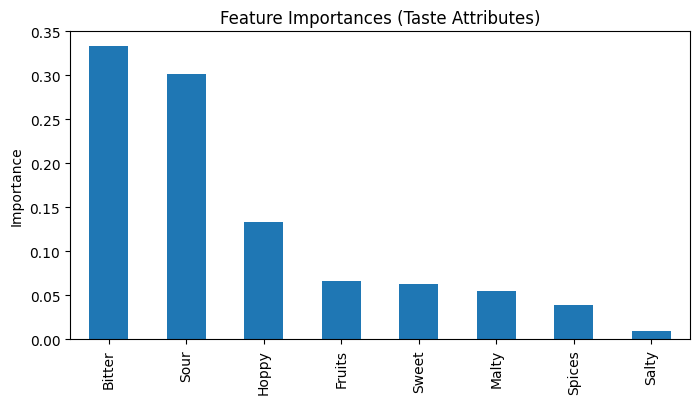

In [57]:
# --- Plot feature importances ---
plt.figure(figsize=(8,4))
feature_importances.plot(kind='bar')
plt.title("Feature Importances (Taste Attributes)")
plt.ylabel("Importance")
plt.show()

The “Feature Importances” list shows which taste dimensions are most influential in predicting style.

Example interpretation:

Sour and Bitter have high importance → these are strong style indicators.

Spices or Salty are less predictive overall.

This tells me which flavors matter most in distinguishing beer types.


How do we know that a depth of 5 is the best depth?

In [58]:
# --- Range of depths to test ---
depths = range(1, 11)

# --- Store results ---
depth_results = []

for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    depth_results.append((d, acc))

print("Done testing different depths.")

Done testing different depths.


   Max Depth  Accuracy
0          1  0.350482
1          2  0.441586
2          3  0.511254
3          4  0.541265
4          5  0.588424
5          6  0.586281
6          7  0.607717
7          8  0.612004
8          9  0.599143
9         10  0.584137


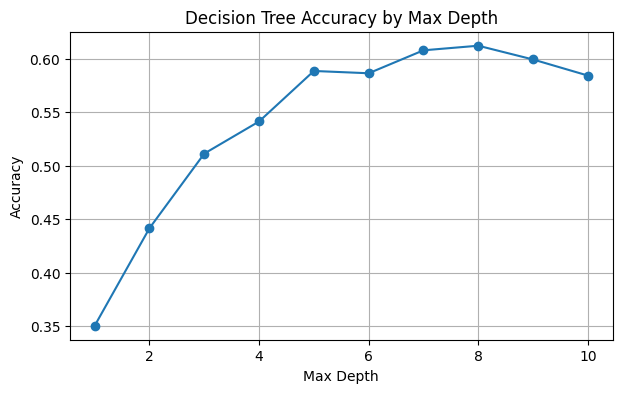

In [59]:
# Convert results to DataFrame
depth_df = pd.DataFrame(depth_results, columns=['Max Depth', 'Accuracy'])
print(depth_df)

# Plot the trend
plt.figure(figsize=(7,4))
plt.plot(depth_df['Max Depth'], depth_df['Accuracy'], marker='o')
plt.title("Decision Tree Accuracy by Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

When I loop through depths (1–10), it can be seen where accuracy peaks.

That’s the optimal tree depth — deep enough to learn real patterns, but not so deep it memorizes training noise.

Although our peak depth may be at 8, this is too many layers for the decision tree to classify by making good decisions, so we stuck to a max depth of 5

Accuracy tells you how well the model predicts the correct beer style on unseen data.
A higher accuracy means the taste features explain style differences better.

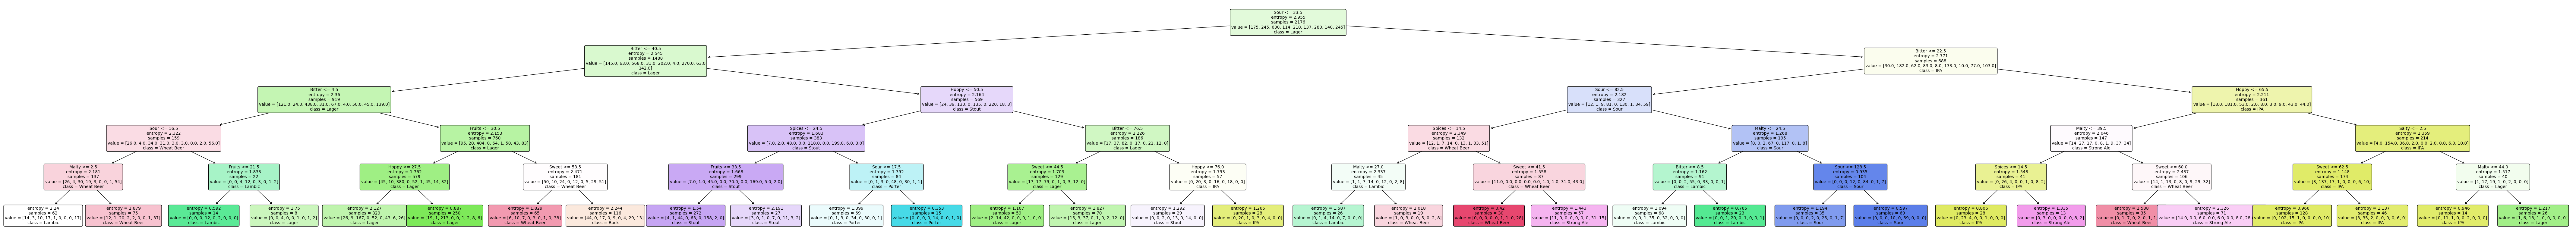

In [73]:
# --- Visualize the decision tree ---
plt.figure(figsize=(110,10))
plot_tree(clf, feature_names=taste_features, class_names=le.classes_, filled=True, rounded=True, fontsize=10)
plt.show()

The plot shows how the model makes decisions:

Each node splits based on a flavor threshold (e.g., “Bitter ≤ 0.5”).

Following branches shows which combinations of flavors lead to specific styles.

This visual is great for understanding the “rules” the model found.

In [63]:
best_depth = depth_df.loc[depth_df['Accuracy'].idxmax(), 'Max Depth']
best_acc = depth_df['Accuracy'].max()

print(f"The best-performing decision tree has a max depth of {best_depth} with an accuracy of {best_acc:.3f}.")
print("Shallower trees tend to underfit, while deeper trees may overfit — this chart helps visualize that tradeoff.")

The best-performing decision tree has a max depth of 8 with an accuracy of 0.612.
Shallower trees tend to underfit, while deeper trees may overfit — this chart helps visualize that tradeoff.


Overall Accuracy: 0.588


<Figure size 1000x800 with 0 Axes>

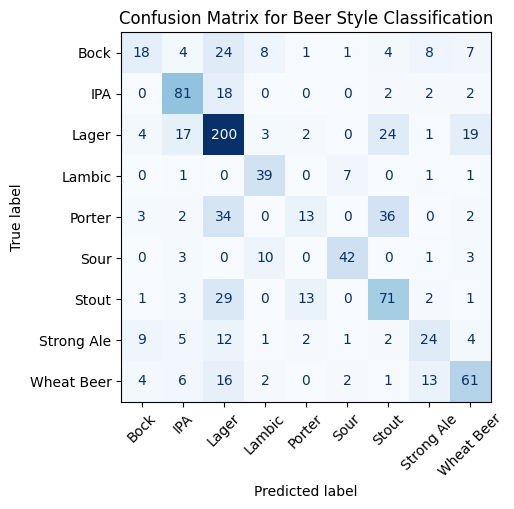

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# --- Use trained model ---
y_pred = clf.predict(X_test)

# --- Calculate overall accuracy ---
overall_acc = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_acc:.3f}")

# --- Compute confusion matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- Display confusion matrix ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45, colorbar=False)
plt.title("Confusion Matrix for Beer Style Classification")
plt.show()

Each row = actual style

Each column = predicted style

Darker diagonal boxes = better performance (more correct predictions).

Off-diagonal boxes = misclassifications

In [65]:
from sklearn.metrics import classification_report

# --- Classification report ---
report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# --- Convert to DataFrame ---
report_df = pd.DataFrame(report).transpose()
print("Classification Report (per beer style):\n")
print(report_df[['precision', 'recall', 'f1-score']].round(2))

Classification Report (per beer style):

              precision  recall  f1-score
Bock               0.46    0.24      0.32
IPA                0.66    0.77      0.71
Lager              0.60    0.74      0.66
Lambic             0.62    0.80      0.70
Porter             0.42    0.14      0.21
Sour               0.79    0.71      0.75
Stout              0.51    0.59      0.55
Strong Ale         0.46    0.40      0.43
Wheat Beer         0.61    0.58      0.60
accuracy           0.59    0.59      0.59
macro avg          0.57    0.55      0.55
weighted avg       0.57    0.59      0.57
